##### 搞笑全景影片合成效果
這篇教學會透過 OpenCV 操作影像的陣列，在即時擷取攝影機畫面時，將部分的內容固定成靜態影像，最後組合成搞笑的全景影片效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 製作一條會動的直線 
參考「[line() 畫直線](https://steam.oxxostudio.tw/category/python/ai/opencv-drawing.html#a1)」文章範例，在讀取攝影機鏡頭畫面，在畫面中繪製一條上到下的紅色直線，透過 while 迴圈改變直線的 x 座標，就能讓紅色直線從畫面的左邊移動到右邊，搭配判斷 x 座標的邏輯，就能讓紅色直線不斷在畫面中移動。

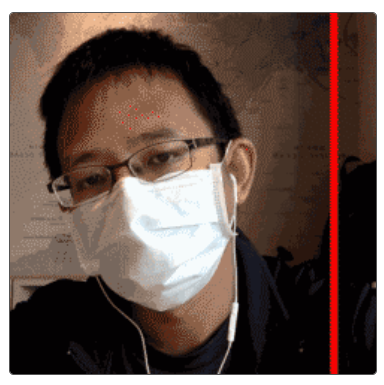

In [1]:
import cv2

cap = cv2.VideoCapture('4096_2160_24fps.mp4')
if not cap.isOpened():
    print("Cannot open camera")
    exit()

w, h = 640, 360                                   # 定義長寬
x = 0                                             # 定義 x 從 0 開始
while True:
    ret, img = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.resize(img,(w,h))                   # 縮小尺寸加快速度
    img = cv2.flip(img, 1)                        # 翻轉影像，使其如同鏡子
    img = img[:, int((w-h)/2):int((h+(w-h)/2))]   # 將影像變成正方形
    cv2.line(img,(x,0),(x,h),(0,0,255),5)         # 畫線
    cv2.imshow('oxxostudio',img)                  # 正常狀況下，一直顯示即時影像
    x = x + 2
    if x > h:
        x = 0
    keyCode = cv2.waitKey(10)                     # 等待鍵盤事件
    if keyCode == ord('q'):
        break                                     # 按下 q 就全部結束

cap.release()
cv2.destroyAllWindows()

##### 左到右的全景影像合成 
延伸紅色線條移動的程式碼，新增一個 output 黑色畫布，當線條移動的同時，擷取影像中某個範圍 ( 例如不斷從左到右擷取 2x360 的範圍 )，\
將這些範圍組合成靜態影像，最後就會輸出一張全景的合成影像，如果在過程中改變姿勢，就會出現莫名其妙的有趣結果，詳細程式碼解說在註解中，\
下方列出一些重點：

* 定義變數 a 和 run 作為存檔的檔名編號，以及判斷是否開始。
* output 為全黑的畫布。
* 判斷鍵盤事件，按下 a 才開始。
* 當擷取結束，按下 s 可以存檔。
* 擷取的當下，將靜態影像合成到 output 畫布，再將靜態區域提供給輸出的 img 使用。

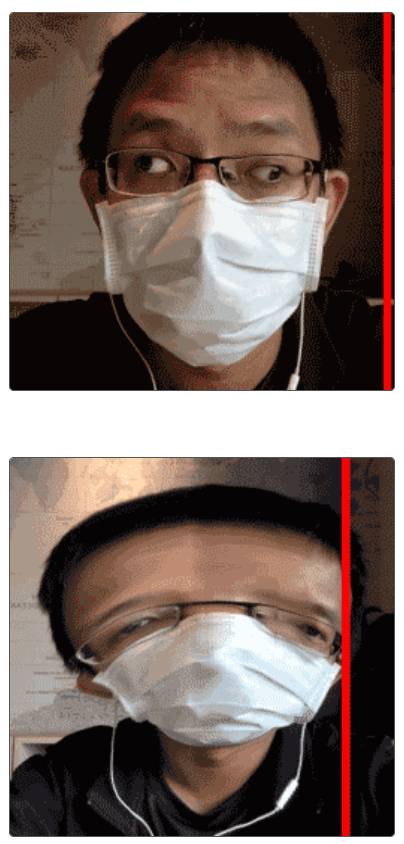

In [3]:
import cv2
import numpy as np

cap = cv2.VideoCapture('4096_2160_24fps.mp4')
if not cap.isOpened():
    print("Cannot open camera")
    exit()

w, h = 640, 360                                   # 定義長寬
a = 1                                             # 存檔的檔名編號從 1 開始
run = 0                                           # 是否開始，0 表示尚未開始，1 表示開始
output = np.zeros((h,h,3), dtype='uint8')         # 設定合成的影像為一張全黑的畫布 ( 長寬使用正方形 )
while True:
    ret, img = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.resize(img,(w,h))                   # 縮小尺寸加快速度
    img = cv2.flip(img, 1)                        # 翻轉影像，使其如同鏡子
    img = img[:, int((w-h)/2):int((h+(w-h)/2))]   # 將影像變成正方形

    keyCode = cv2.waitKey(10)                     # 等待鍵盤事件
    if keyCode == ord('a') and run == 0:
        x = 0                                     # 如果按下 a，設定 x 為 0
        run = 1                                   # 開始合成
    elif keyCode == ord('q'):
        break                                     # 按下 q 就全部結束

    if run == 1:
        output[0:h, x:x+2] = img[0:h, x:x+2]      # 設定 output 的某個區域為即時影像 img 的某區域
        cv2.line(img,(x+5,0),(x+5,h),(0,0,255),5) # 畫線 ( 因為線條寬度 5，所以位移 5 )
        x = x + 2                                 # 改變 x 位置
        img[0:h,0:x] = output[0:h,0:x]            # 設定即時影像 img 的某區域為 output
        cv2.imshow('oxxostudio',img)              # 顯示即時影像
        if x > h:
            keyCode = cv2.waitKey() == ord('s')   # 如果寬度抵達正方形邊緣，等待鍵盤事件按下 s
            cv2.imwrite(f'oxxo-{a}.jpg',img)      # 存檔
            a = a + 1                             # 檔名編號增加 1
            run = 0                               # 停止合成
    else:
        cv2.imshow('oxxostudio',img)              # 正常狀況下，一直顯示即時影像

cap.release()
cv2.destroyAllWindows()

##### 上到下的全景影像合成 
運用同樣的原理，修改參數，就可將影像改成從上到下的全景影像合成。

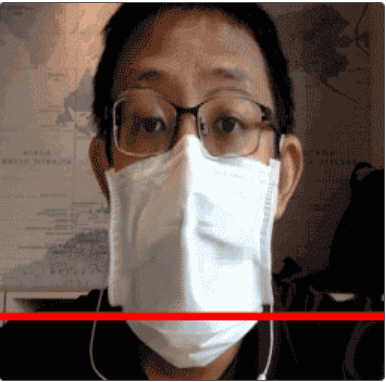

In [4]:
import cv2
import numpy as np

cap = cv2.VideoCapture('4096_2160_24fps.mp4')
if not cap.isOpened():
    print("Cannot open camera")
    exit()

w, h = 640, 360                                   # 定義長寬
a = 1                                             # 存檔的檔名編號從 1 開始
run = 0                                           # 是否開始，0 表示尚未開始，1 表示開始
output = np.zeros((h,h,3), dtype='uint8')         # 設定合成的影像為一張全黑的畫布
while True:
    ret, img = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.resize(img,(w,h))                   # 縮小尺寸加快速度
    img = cv2.flip(img, 1)                        # 翻轉影像，使其如同鏡子
    img = img[:, int((w-h)/2):int((h+(w-h)/2))]   # 將影像變成正方形

    keyCode = cv2.waitKey(10)                     # 等待鍵盤事件
    if keyCode == ord('a') and run == 0:
        y = 0                                     # 如果按下 a，設定 y 為 0
        run = 1                                   # 開始合成
    elif keyCode == ord('q'):
        break                                     # 按下 q 就全部結束

    if run == 1:
        output[y:y+2, 0:h] = img[y:y+2, 0:h]      # 設定 output 的某個區域為即時影像 img 的某區域
        cv2.line(img,(0,y+5),(h,y+5),(0,0,255),5) # 畫線
        y = y + 2                                 # 改變 x 位置
        img[0:y,0:h] = output[0:y,0:h]            # 設定即時影像 img 的某區域為 output
        cv2.imshow('oxxostudio',img)              # 顯示即時影像
        if y > h:
            keyCode = cv2.waitKey() == ord('s')   # 如果寬度抵達正方形邊緣，等待鍵盤事件按下 s
            cv2.imwrite(f'oxxo-{a}.jpg',img)      # 存檔
            a = a + 1                             # 檔名編號增加 1
            run = 0                               # 停止合成
    else:
        cv2.imshow('oxxostudio',img)              # 正常狀況下，一直顯示即時影像

cap.release()
cv2.destroyAllWindows()